Index
- [Cleaning](#Cleaning)
- [EDA](#EDA)
- [Region as dependent variable](#Region)
- [Age as dependent variable](#Age)
- [Questions](#Questions)
-[Question 1](#Question_1)
-[Question 2](#Question_2)

Suggestions
- Discretize Age and use it as the dependent variable; experiment with different numbers of bins
- Discretize Amount and use it as the dependent variable. Can a useful model be constructed?
- Use RandomForestClassifier
- Use GradientBoostingClassifier

In [115]:
# Data Science Basics
import numpy as np
import pandas as pd
#import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# helper
%matplotlib inline

# Cleaning

In [116]:
data = pd.read_csv('Data/0_Demographic_data.csv')


In [117]:
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [118]:
data = data.drop_duplicates()

In [119]:
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [120]:
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

# EDA

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [122]:
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


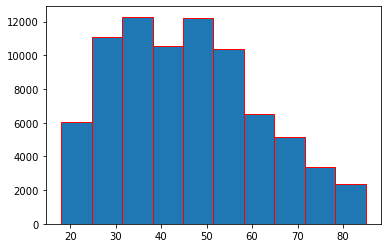

In [123]:
# it shows the distribution of age
# it is skewed to the right
plt.hist(data.age,edgecolor="red", bins=10)
plt.show()

# Question_1

1. Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?

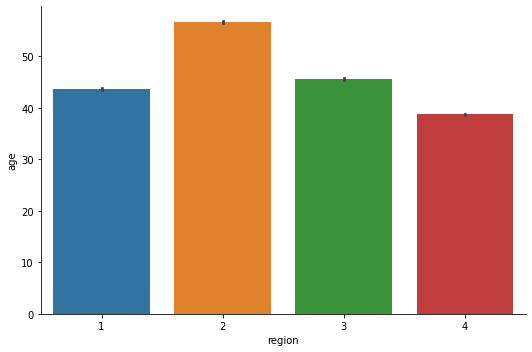

In [124]:
fg = sns.catplot(x = 'region', y = 'age', data = data, kind = 'bar', aspect = 1.5)

In [125]:
regionage = data.groupby('region')['age'].mean()


In [126]:
regionage.nlargest(4)

region
2    56.609083
3    45.646944
1    43.704132
4    38.752424
Name: age, dtype: float64

- On average region 2 has the oldest population, next is region 3, then region 1, and finally region 4.
- Yes,we can predict with 63.7% accuracy if the person is 45 and younger, or older than 45.
    - Plese check the **Age as dependent variable** section.

# Question_2

2. Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?

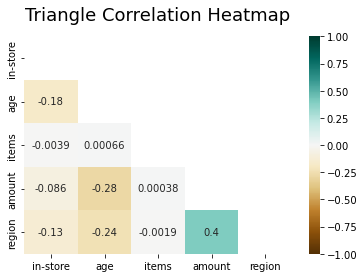

In [127]:
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

- In-store and age have a negative correlation of -0.18. When age increases then in-store decreases. Therefore, older people tend to buy in-store and younger people online.
- In-store and region have a negative correlation. When region increases then in-store decreases. The North tends to buy in-store.The West tends to buy online. Therefore the regions North, South, East, West (in that order) are less likely to buy in-store.
North (1)
South (2)
East (3)
West (4)
- The other variables have a very weak or non existent linear relationship with in-store.

# Change the variables age and amount to binary

In [128]:
# Here you make the variable age binary
data.loc[data['age'] <= 45, 'age'] = 0 # 0 is a person who is 45 years old or younger  
data.loc[data['age'] > 45, 'age'] = 1 # 1 is a person who has 46 years old or older

In [129]:
data.age.value_counts()

0    41677
1    38302
Name: age, dtype: int64

In [130]:
data.loc[data['amount'] <= 835, 'amount'] = 0
data.loc[data['amount'] > 835, 'amount'] = 1

In [131]:
data.amount.value_counts()

0.0    49732
1.0    30247
Name: amount, dtype: int64

In [132]:
data['amount'] = data['amount'].astype(int)

/var/folders/n3/5xbzzgpd60xd4_r3pwmpzmsc0000gn/T/ipykernel_899/388717072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amount'] = data['amount'].astype(int)


In [133]:
data.dtypes

in-store    int64
age         int64
items       int64
amount      int64
region      int64
dtype: object

In [134]:
data.head()

,in-store,age,items,amount,region
0,0,0,4,0,2
1,0,0,2,0,2
2,1,0,3,1,4
3,1,1,3,0,3
4,1,0,4,1,1


In [135]:
data.amount.value_counts()

0    49732
1    30247
Name: amount, dtype: int64

# Question_3_&_4


3. What about items? Are these even in the tree? Why or why not?
- Yes, the variable items is on the tree, but it has a very low importance to predict the dependent variable in all models.
4. What about classifying where a transaction took place -can that be done successfully?
- Yes, it can be done successfully. Please check the **Region as dependent variable** and **Age as dependent variable sections**.

# Region

## We want to predict region.

## Train/Test Split Method

In [74]:
# Select features
X = data.iloc[:,0:4]
# it doesn't include region because it is the limit.
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,0,4,0
1,0,0,2,0
2,1,0,3,1
3,1,1,3,0
4,1,0,4,1


In [75]:
#dependent variable
y = data['region']

In [76]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)



In [77]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [78]:
#Predictions
preds = model.predict(X_test)

In [79]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.40      0.40      4838
           2       0.80      1.00      0.89      5979
           3       0.44      0.29      0.35      5391
           4       0.60      0.63      0.61      7786

    accuracy                           0.60     23994
   macro avg       0.56      0.58      0.56     23994
weighted avg       0.57      0.60      0.58     23994



In [80]:
feature_importances_df = pd.DataFrame({'feature': X.columns.values, 'importance': model.feature_importances_})

In [81]:
feature_importances_df.sort_values(by="importance",ascending= False)

,feature,importance
3,amount,0.533064
0,in-store,0.421928
1,age,0.043510
2,items,0.001499


In [82]:
from sklearn.tree import plot_tree

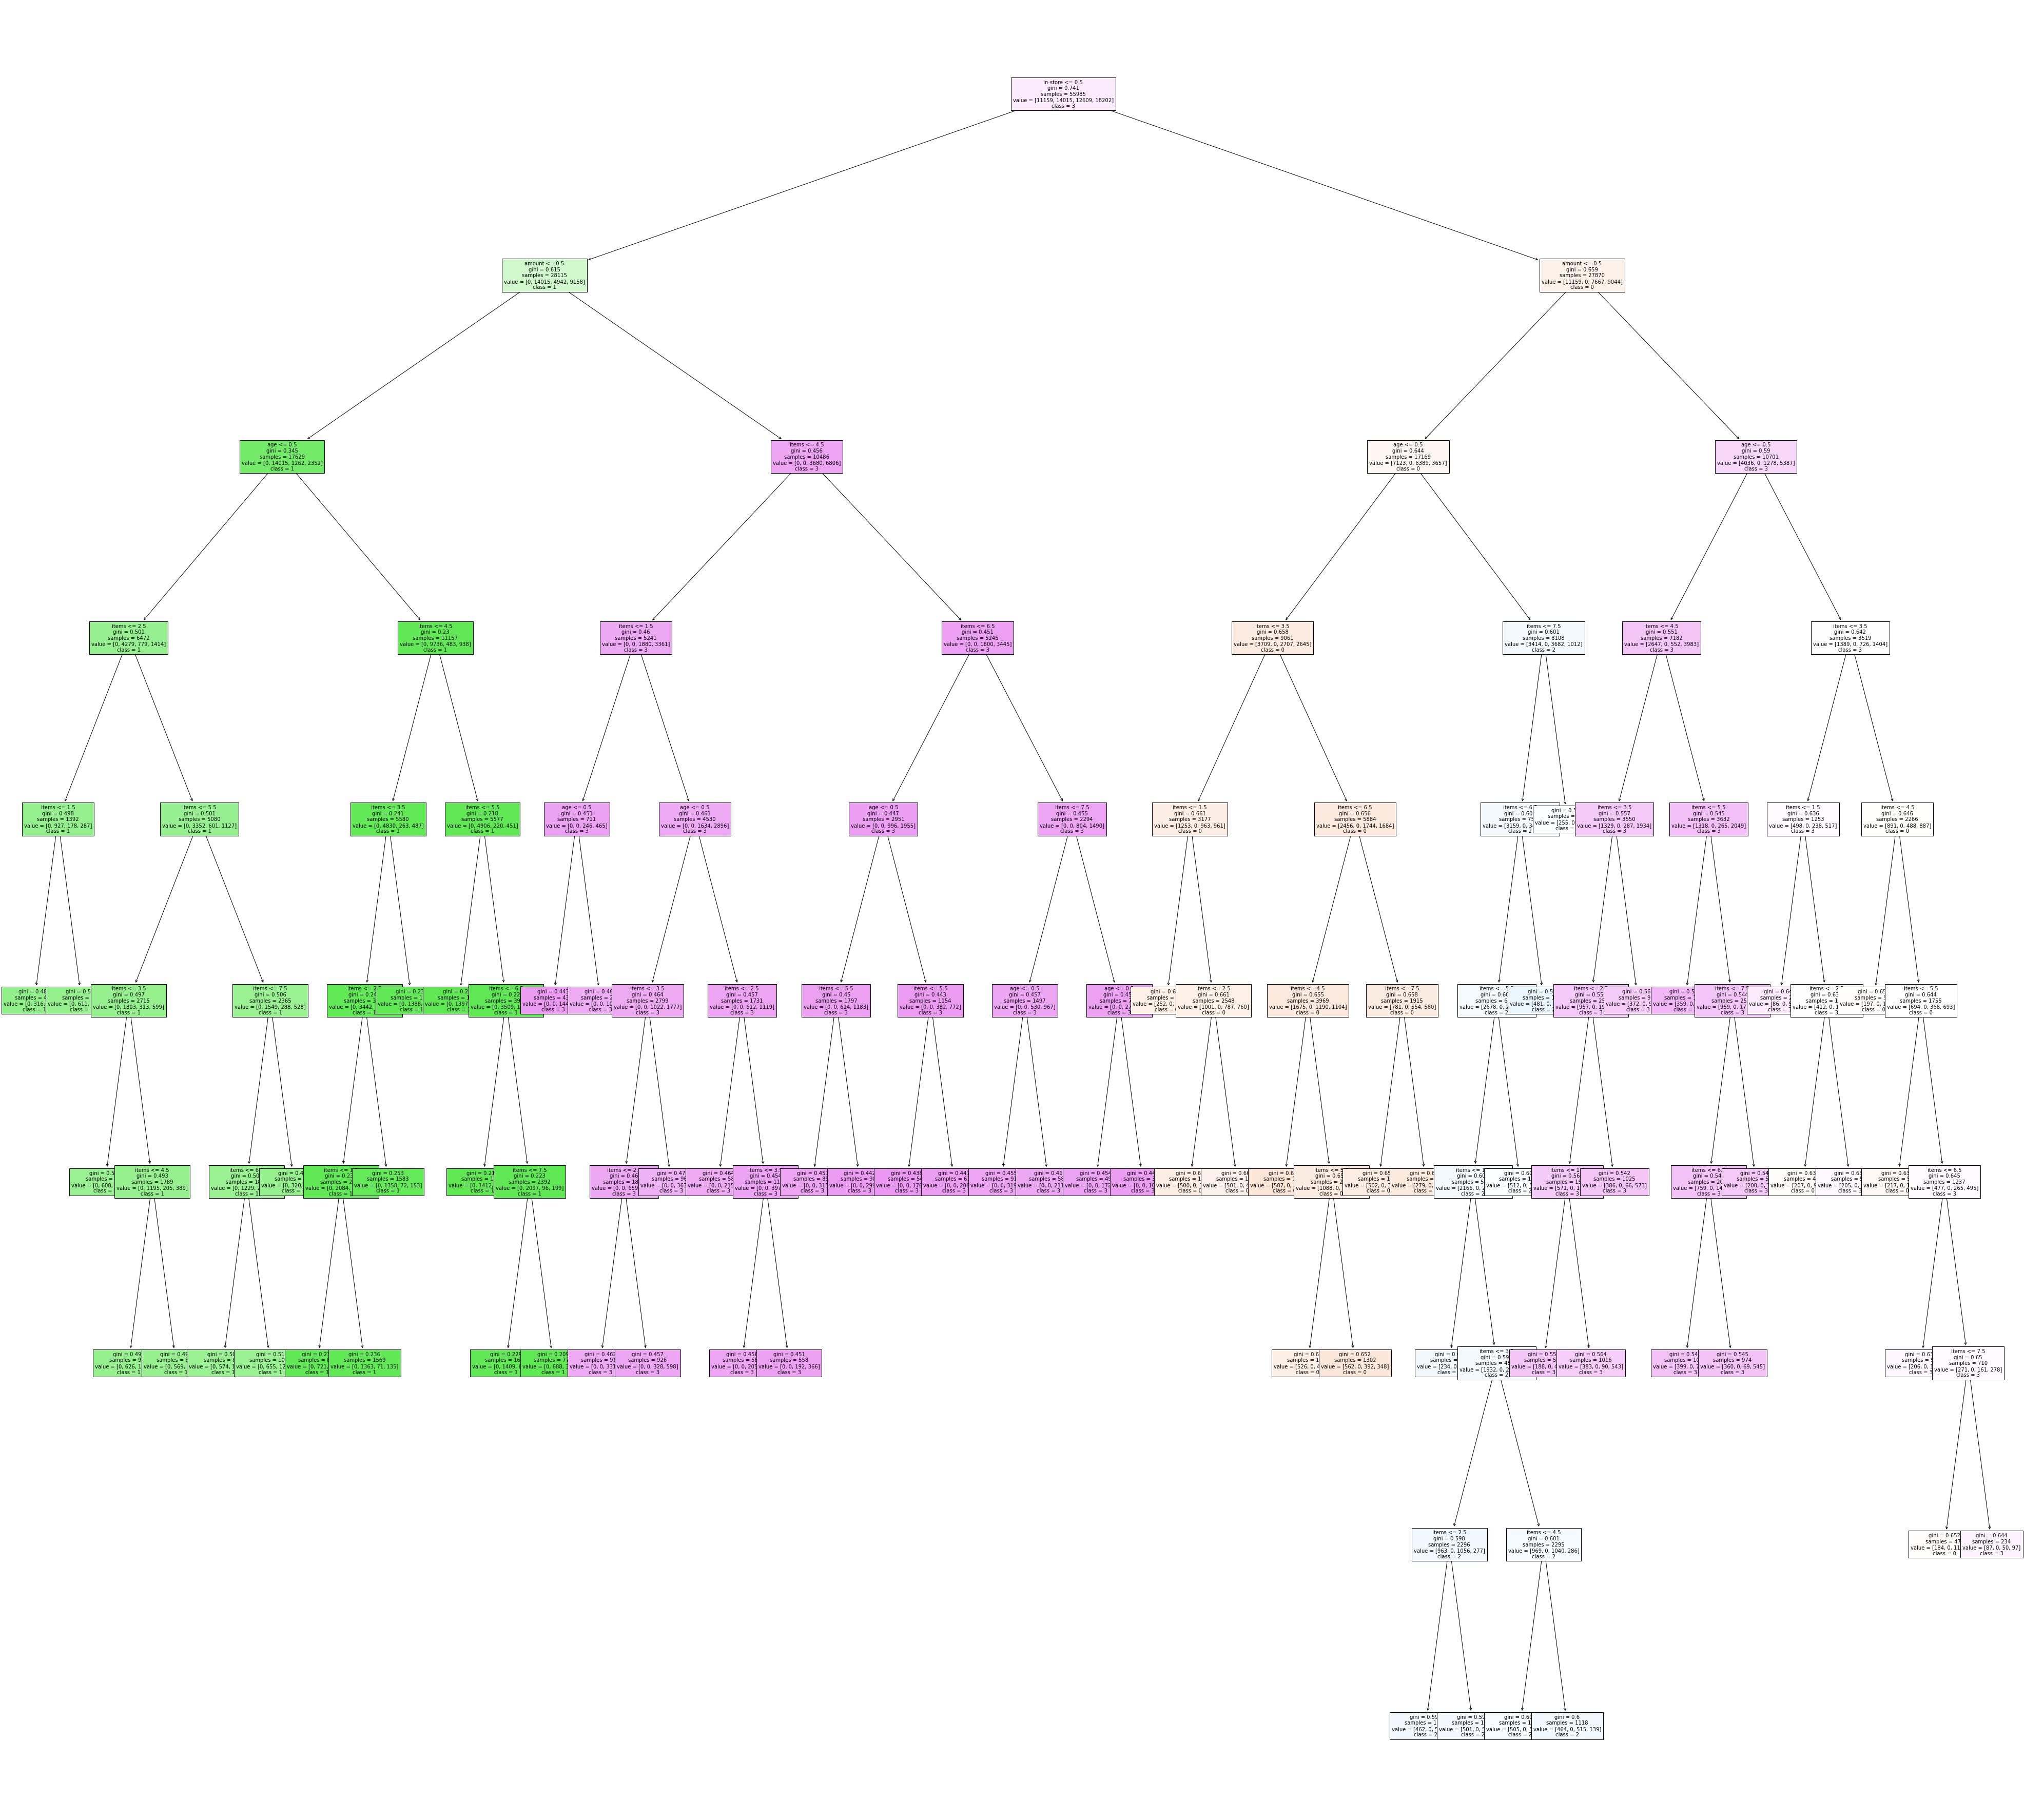

In [83]:
fig = plt.figure(figsize=(70,65))
tree = plot_tree(model, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True, fontsize=10)

## Random Forest Classifier

In [84]:
#Modeling (Classification)
algo = RandomForestClassifier()
model = algo.fit(X_train,y_train)

In [85]:
#Predictions
preds = model.predict(X_test)

In [86]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.40      0.40      4838
           2       0.80      1.00      0.89      5979
           3       0.44      0.29      0.35      5391
           4       0.60      0.63      0.61      7786

    accuracy                           0.60     23994
   macro avg       0.56      0.58      0.56     23994
weighted avg       0.57      0.60      0.58     23994



In [87]:
feature_importances_df = pd.DataFrame({'feature': X.columns.values, 'importance': model.feature_importances_})

In [88]:
feature_importances_df.sort_values(by="importance",ascending= False)

,feature,importance
0,in-store,0.498776
3,amount,0.431451
1,age,0.066477
2,items,0.003297


## Gradient Boosting Classifier

In [89]:
#Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train,y_train)

In [90]:
#Predictions
preds = model.predict(X_test)

In [91]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.39      0.36      0.37      4838
           2       0.80      1.00      0.89      5979
           3       0.44      0.29      0.35      5391
           4       0.59      0.65      0.62      7786

    accuracy                           0.60     23994
   macro avg       0.56      0.57      0.56     23994
weighted avg       0.57      0.60      0.58     23994



In [92]:
model.feature_importances_

array([0.45048918, 0.0428316 , 0.00064062, 0.5060386 ])

In [93]:
Imp = np.stack((X.columns.values,model.feature_importances_), axis = 1)
Imp

array([['in-store', 0.45048918332657745],
       ['age', 0.04283159891253642],
       ['items', 0.00064061697391099],
       ['amount', 0.5060386007869752]], dtype=object)

In [94]:
feature_importances_df = pd.DataFrame({'feature': X.columns.values, 'importance': model.feature_importances_})

In [95]:
feature_importances_df.sort_values(by="importance",ascending= False)

,feature,importance
3,amount,0.506039
0,in-store,0.450489
1,age,0.042832
2,items,0.000641


# Cross_Validation

In [96]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [97]:
#classification
results = []
names = []
    

In [98]:
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [99]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5980444865520742
Decision Tree Classifier 0.5979444615458227
Gradient Boosting Classifier 0.5979819624811301


The Random Forest Classifier has slightly more accuracy than the other two models.Therefore, I choose the Random Forest Classifier model.
- The most important features to predict region is amount and whether they shopped in-store or online.

# Age

## We want to predict age

Age was split in two. Those 45 and younger ,and those older than 45.
- age <= 45 is denoted with a 0
- age > 45 is denoted with a 1

## Train/Test Split Method

In [136]:
# Select features
X = data.filter(['in-store','amount','items','region'], axis=1)
# it doesn't include region because it is the limit.
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,amount,items,region
0,0,0,4,2
1,0,0,2,2
2,1,1,3,4
3,1,0,3,3
4,1,1,4,1


In [137]:
#dependent variable
y = data['age']

In [138]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)



In [139]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [140]:
#Predictions
preds = model.predict(X_test)

In [141]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     12529
           1       0.65      0.52      0.58     11465

    accuracy                           0.64     23994
   macro avg       0.64      0.63      0.63     23994
weighted avg       0.64      0.64      0.63     23994



In [142]:
feature_importances_df = pd.DataFrame({'feature': X.columns.values, 'importance': model.feature_importances_})

In [143]:
feature_importances_df.sort_values(by="importance",ascending= False)

,feature,importance
3,region,0.575176
1,amount,0.226538
0,in-store,0.188090
2,items,0.010196


In [144]:
from sklearn.tree import plot_tree

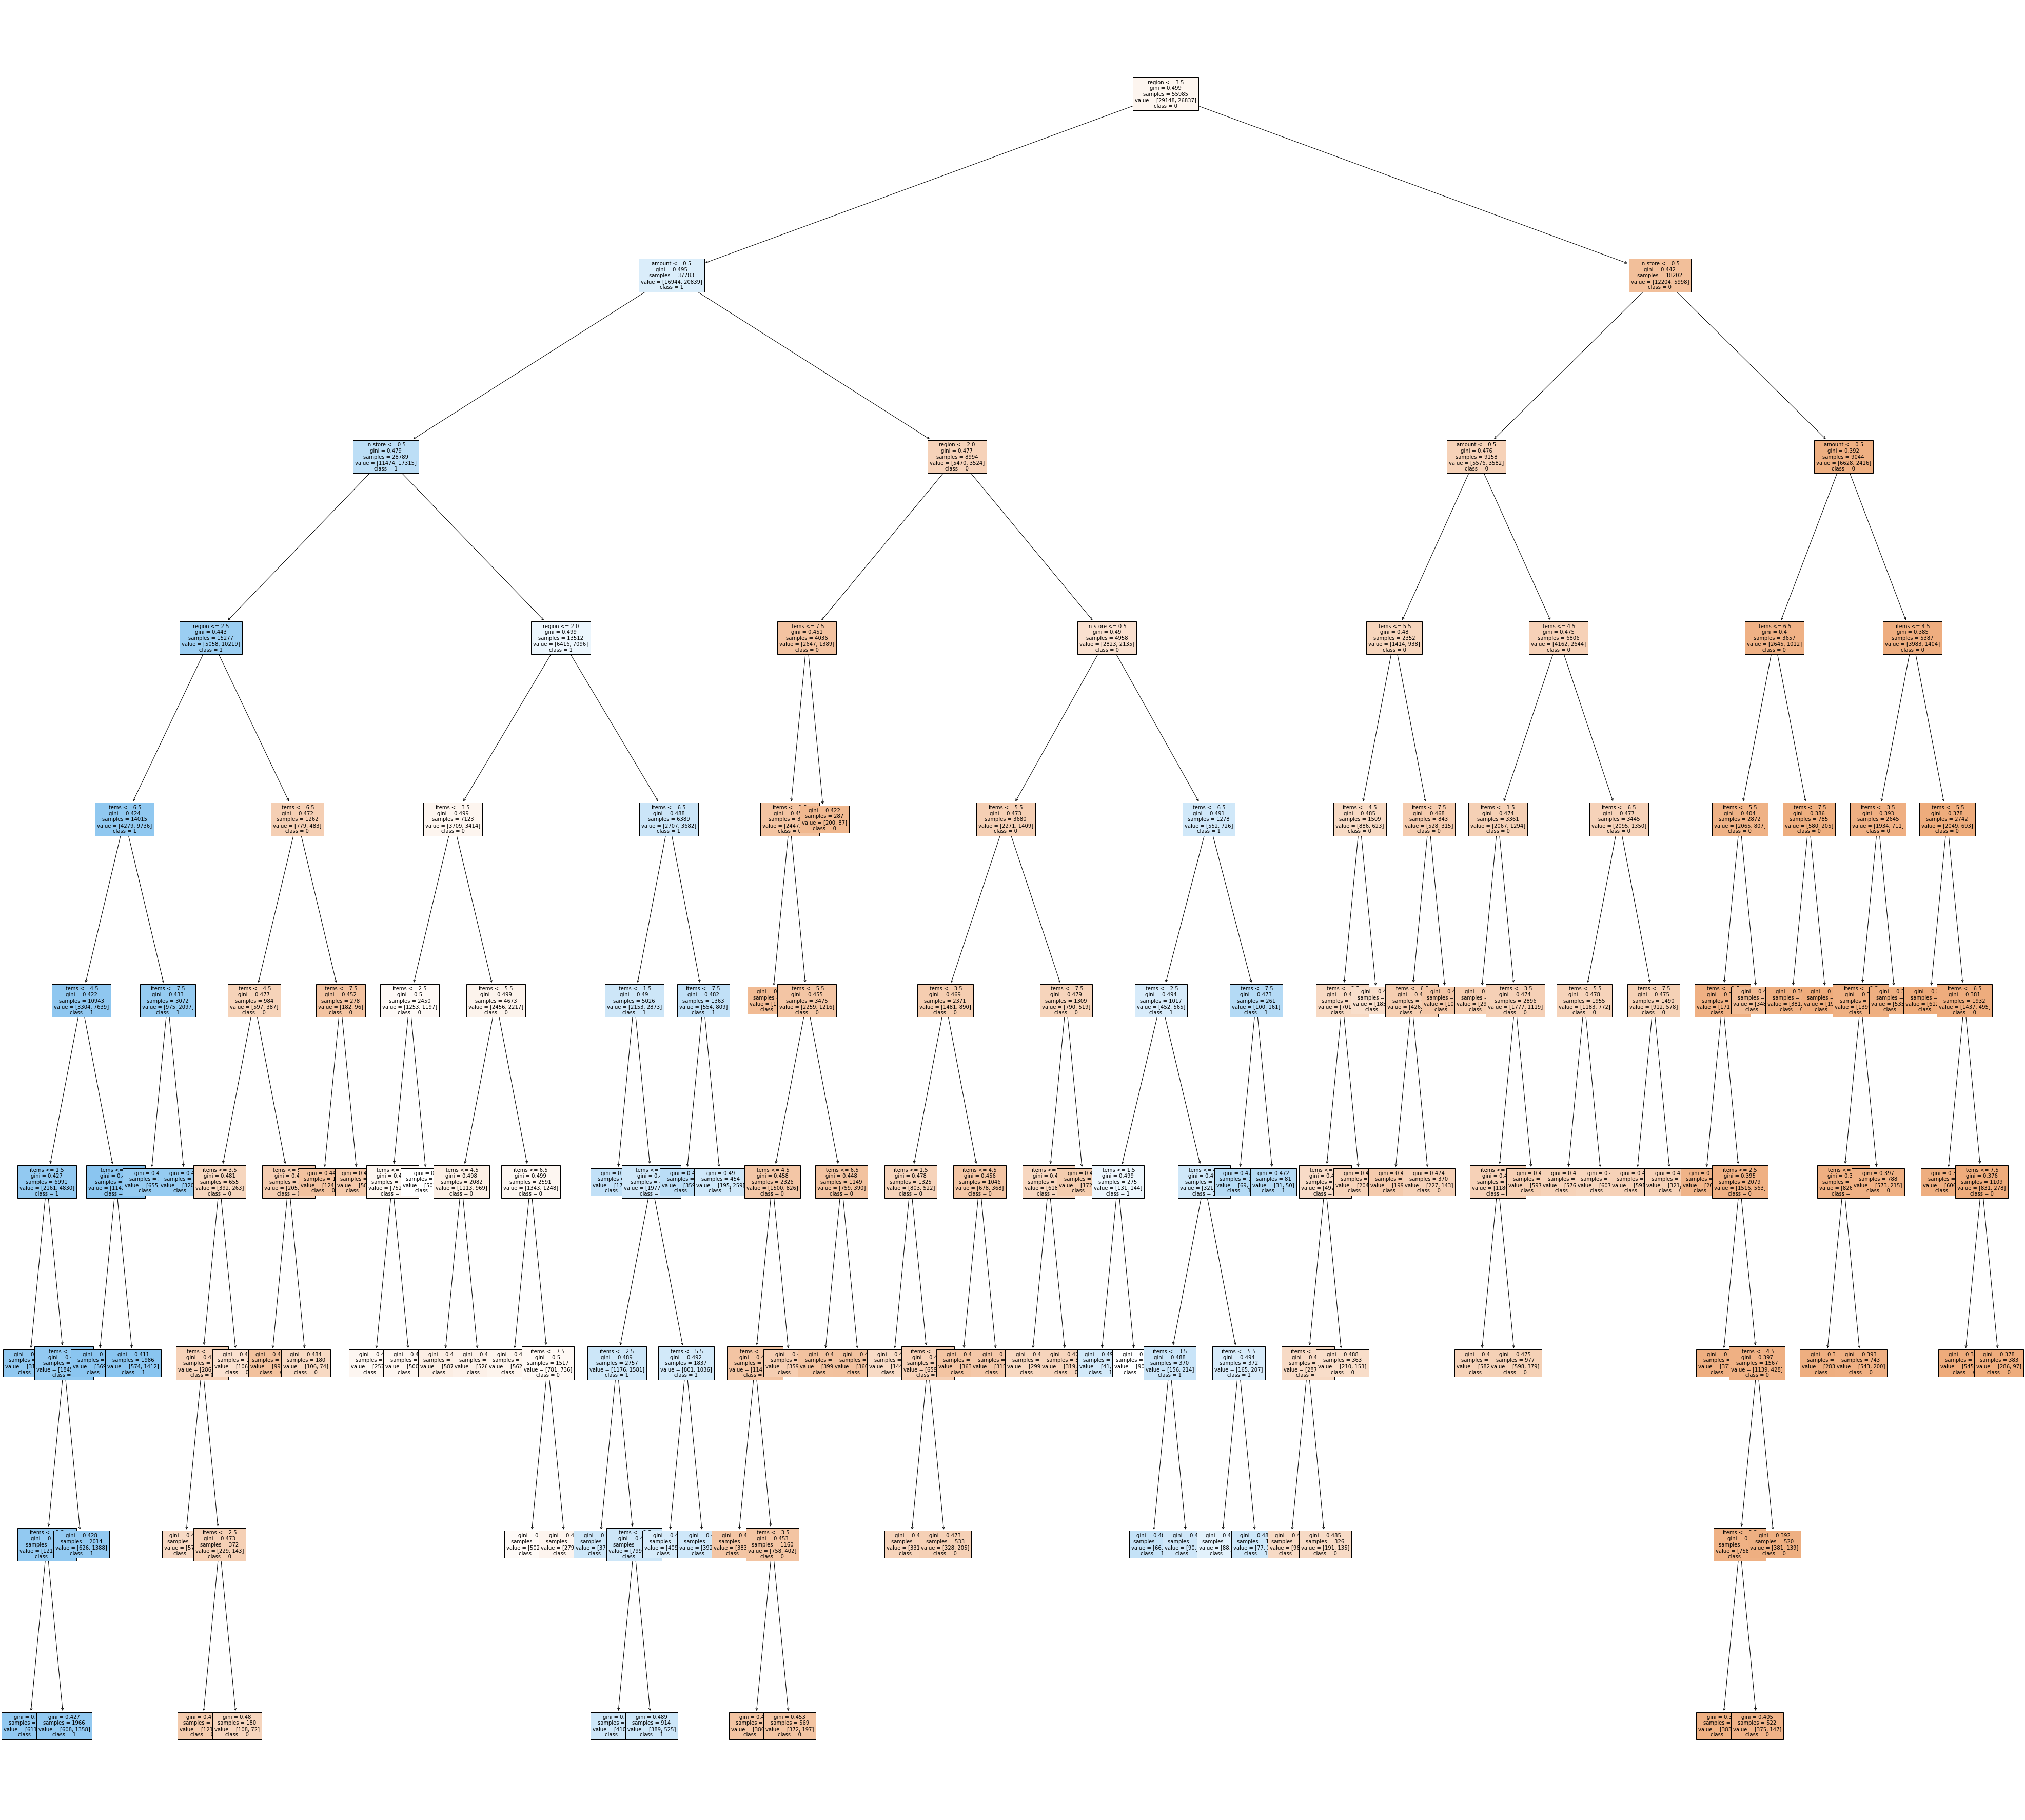

In [145]:
fig = plt.figure(figsize=(70,65))
tree = plot_tree(model, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True, fontsize=10)

## Random Forest Classifier

In [146]:
#Modeling (Classification)
algo = RandomForestClassifier()
model = algo.fit(X_train,y_train)

In [147]:
#Predictions
preds = model.predict(X_test)

In [148]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67     12529
           1       0.64      0.54      0.59     11465

    accuracy                           0.63     23994
   macro avg       0.63      0.63      0.63     23994
weighted avg       0.63      0.63      0.63     23994



In [149]:
feature_importances_df = pd.DataFrame({'feature': X.columns.values, 'importance': model.feature_importances_})

In [150]:
feature_importances_df.sort_values(by="importance",ascending= False)

,feature,importance
3,region,0.612459
1,amount,0.223958
0,in-store,0.143405
2,items,0.020178


## Gradient Boosting Classifier

In [151]:
#Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train,y_train)

In [152]:
#Predictions
preds = model.predict(X_test)

In [153]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     12529
           1       0.65      0.52      0.58     11465

    accuracy                           0.64     23994
   macro avg       0.64      0.63      0.63     23994
weighted avg       0.64      0.64      0.63     23994



In [154]:
model.feature_importances_

array([0.19124608, 0.19693602, 0.00292426, 0.60889364])

In [155]:
Imp = np.stack((X.columns.values,model.feature_importances_), axis = 1)
Imp

array([['in-store', 0.19124608383231237],
       ['amount', 0.19693602039459368],
       ['items', 0.0029242602608945153],
       ['region', 0.6088936355121994]], dtype=object)

In [156]:
feature_importances_df = pd.DataFrame({'feature': X.columns.values, 'importance': model.feature_importances_})

In [157]:
feature_importances_df.sort_values(by="importance",ascending= False)

,feature,importance
3,region,0.608894
1,amount,0.196936
0,in-store,0.191246
2,items,0.002924


# Cross_Validation

In [158]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [159]:
#classification
results = []
names = []
    

In [160]:
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [161]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6364170415423541
Decision Tree Classifier 0.6364170415423541
Gradient Boosting Classifier 0.6370922103345521


The Gradient Boosting Classifier has slightly more accuracy than the other two models.Therefore, I choose the Gradient boosting model.

- The most imortant feature to predict age is region.